In [1]:

import numpy as np
import pandas as pd

def raw_data(path):
  data = pd.read_csv(path)
  return data.values

In [3]:
import math

def getDistance(dataPoint, x, k):
    distances = np.array([np.linalg.norm(i-x) for i in dataPoint])
    return np.sort(distances)[k-1]


def KNN(data_2d, k,X_2d):
    N = np.size(data_2d, 1)  
    probs = []  

    for x in X_2d:
        v = math.pi * (getDistance(data_2d,x,k)**2)
        if v == 0:
            probs.append(1)
        else:
            px = k/(N * v)
            probs.append(px)  

    return probs

In [5]:
data_2s = raw_data('dataset.csv')
data_2d = data_2s[:,:-1]
print("2D Data: \n", data_2d.shape)


2D Data: 
 (1500, 2)


In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Ks = [1,9,99]


In [36]:
# generate sample
x = np.linspace(np.amin(data_2d[:, 0]), np.amax(
    data_2d[:, 0]), 100).reshape(-1, 1)
y = np.linspace(np.amin(data_2d[:, 1]), np.amax(
    data_2d[:, 1]), 100).reshape(-1, 1)
xx, yy = np.meshgrid(x, y)
X_2d = np.concatenate(
    [xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)], axis=1)
print(X_2d.shape)

(10000, 2)


In [32]:
probability = []
for k in Ks:
    print("k: ",k)
    probs = KNN(data_2d, k,X_2d)
    zz = np.array(probs).reshape(xx.shape)
    probability.append(zz)

print("End KNN")

k:  1
k:  9
k:  99
End KNN


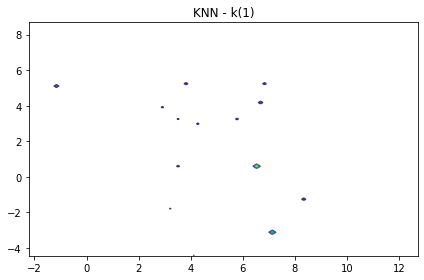

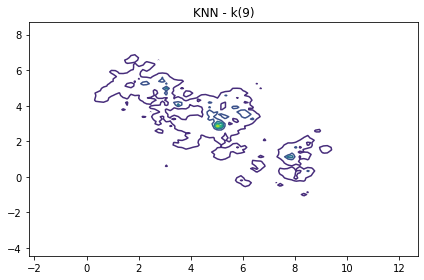

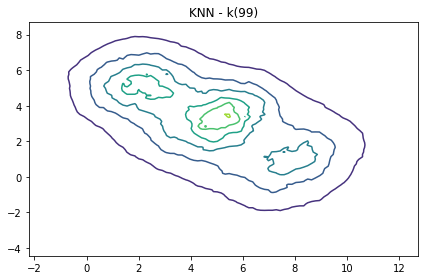

In [33]:
for i in range(len(Ks)):
    fig, ax = plt.subplots(1)
    ax.contour(xx, yy, probability[i])
    ax.set_title('KNN - k('+str(Ks[i])+')')
    fig.tight_layout()

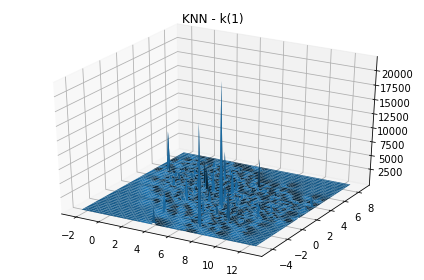

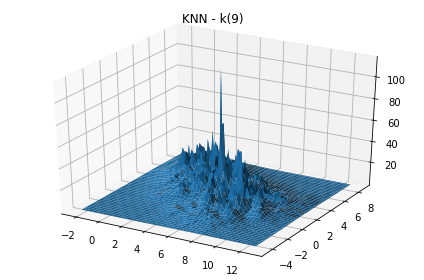

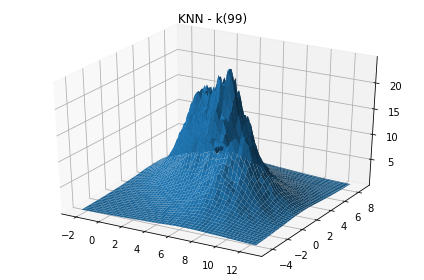

In [35]:
for i in range(len(Ks)):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(xx, yy, probability[i])
    ax.set_title('KNN - k('+str(Ks[i])+')')
    fig.tight_layout()